In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from fem.polynomial_chaos import legendre_chaos

### d = 1

In [2]:
basis = legendre_chaos(1, 3)
len(basis), basis

(4,
 [<function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>])

/home/alex/Programming/uni/polynomail_chaos/src/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


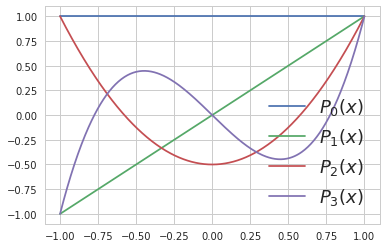

In [3]:
xs = np.linspace(-1, 1, 512)

fig, ax = plt.subplots(1)

for n in range(len(basis)):
    
    ys = [basis[n]([x]) for x in xs]
    
    ax.plot(xs, ys, label=r'$P_{%i}(x)$' % n)

ax.legend(loc=0, fontsize=18)

In [4]:
basis[2]((0,))

-0.50000000000000011

In [5]:
from scipy.special import legendre

In [6]:
legendre(2)(0)

-0.50000000000000011

### d = 2

In [7]:
basis = legendre_chaos(2, 3)
len(basis), basis

(10,
 [<function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>,
  <function fem.polynomial_chaos.mk_lengendre_basis.<locals>.Ps>])

/home/alex/Programming/uni/polynomail_chaos/src/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


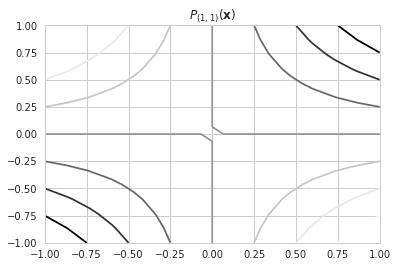

In [33]:
N = 16
i = 5
xs = np.linspace(-1, 1, N)

ys = np.array([basis[i]((x, y)) for x in xs for y in xs ])
ys = ys.reshape((N,N))

XS, YS = np.meshgrid(xs, xs)

fig, ax = plt.subplots(1)
ax.contour(XS, YS, ys)
ax.set_title(r'$P_{%s}(\mathbf{x})$' % basis[i]._index)
